# ML Project : chord embedding

A goal of this project is to be able to project the different chords into a space, and therefore conclude on the similarity between chords, between different composers,..

In [8]:
#import packages :
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

# Load the vocabulary data

In [2]:
#folders
data_folder = 'C:/Users/HP/ML_project_chord/data/'
chord_folder = 'C:/Users/HP/ML_project_chord/data/chord/'
key_folder = 'C:/Users/HP/ML_project_chord/data/key/'

In [21]:
#Load the chord vocabulary text files 

#Files :
chord_voc_full_file = data_folder + 'chord_vocab_full.txt'
chord_voc_maj_file = data_folder + 'chord_vocab_major.txt'
chord_voc_min_file = data_folder + 'chord_vocab_minor.txt'

chord_voc_full = pd.read_csv(chord_voc_full_file, sep = ':', header = None)
chord_voc_maj = pd.read_csv(chord_voc_maj_file, sep = ':', header = None)
chord_voc_min = pd.read_csv(chord_voc_min_file, sep = ':', header = None)

chord_voc_full.shape

(92, 2)

In [4]:
#Load the key vocabulary text files 

#Files :
key_voc_full_file = data_folder + 'key_vocab_full.txt'
key_voc_maj_file = data_folder + 'key_vocab_major.txt'
key_voc_min_file = data_folder + 'key_vocab_minor.txt'

key_voc_full = pd.read_csv(key_voc_full_file, sep = ':', header = None)
key_voc_maj = pd.read_csv(key_voc_maj_file, sep = ':', header = None)
key_voc_min = pd.read_csv(key_voc_min_file, sep = ':', header = None)

key_voc_full.shape[0], key_voc_maj.shape[0], key_voc_min.shape[0] 

(42, 32, 33)

# Load the key data 

In [10]:
def load_key_data(file):
    '''
    Function that returns the csv file as a dataframe for one composer
    
    - Input : file name (example : 'Bach.csv')'''
    #We use sep='\n' to be able to first separate each line, but we'll have just one column
    data = pd.read_csv(key_folder + file, sep='\n' ,header= None, error_bad_lines = False)
    
    #same as before : we add columns for the case when there is more than one symbol
    data = data[0].str.split(',', expand=True)
    
    #If we want to remove lines with only one symbol : uncomment the following line
    data = data.drop(data[data[1].apply(lambda x: x is None)].index) #drop all lines for which the value of the second column is 'None'
    return data

#exemple : Bach
bach_key = load_key_data('Bach.csv')
bach_key.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
18,I:MINOR,III:MAJOR,V:MINOR,VI:MAJOR,I:MINOR,None,None,None,None,None,None,None,None
26,I:MAJOR,V:MAJOR,VI:MINOR,III:MINOR,VI:MINOR,II:MINOR,IV:MAJOR,I:MAJOR,None,None,None,None,None
27,I:MAJOR,V:MAJOR,I:MAJOR,None,None,None,None,None,None,None,None,None,None
40,I:MINOR,V:MINOR,I:MINOR,III:MAJOR,I:MINOR,V:MINOR,I:MINOR,IV:MINOR,VI:MAJOR,IV:MINOR,I:MINOR,III:MAJOR,I:MINOR
47,I:MINOR,V:MINOR,I:MINOR,None,None,None,None,None,None,None,None,None,None


# Load the data, create a word2vec model, perform PCA, vizualize results

We create several functions :
- One that loads the chord data and create a word2vec model for the MAJOR and MINOR mode, plus one general, containing both major and minor modes
- One that put the coordinates of each word in the embedding space in a matrix
- One that performs PCA, and returns the 2 principal components of PCA for each model.


Let's see the results 

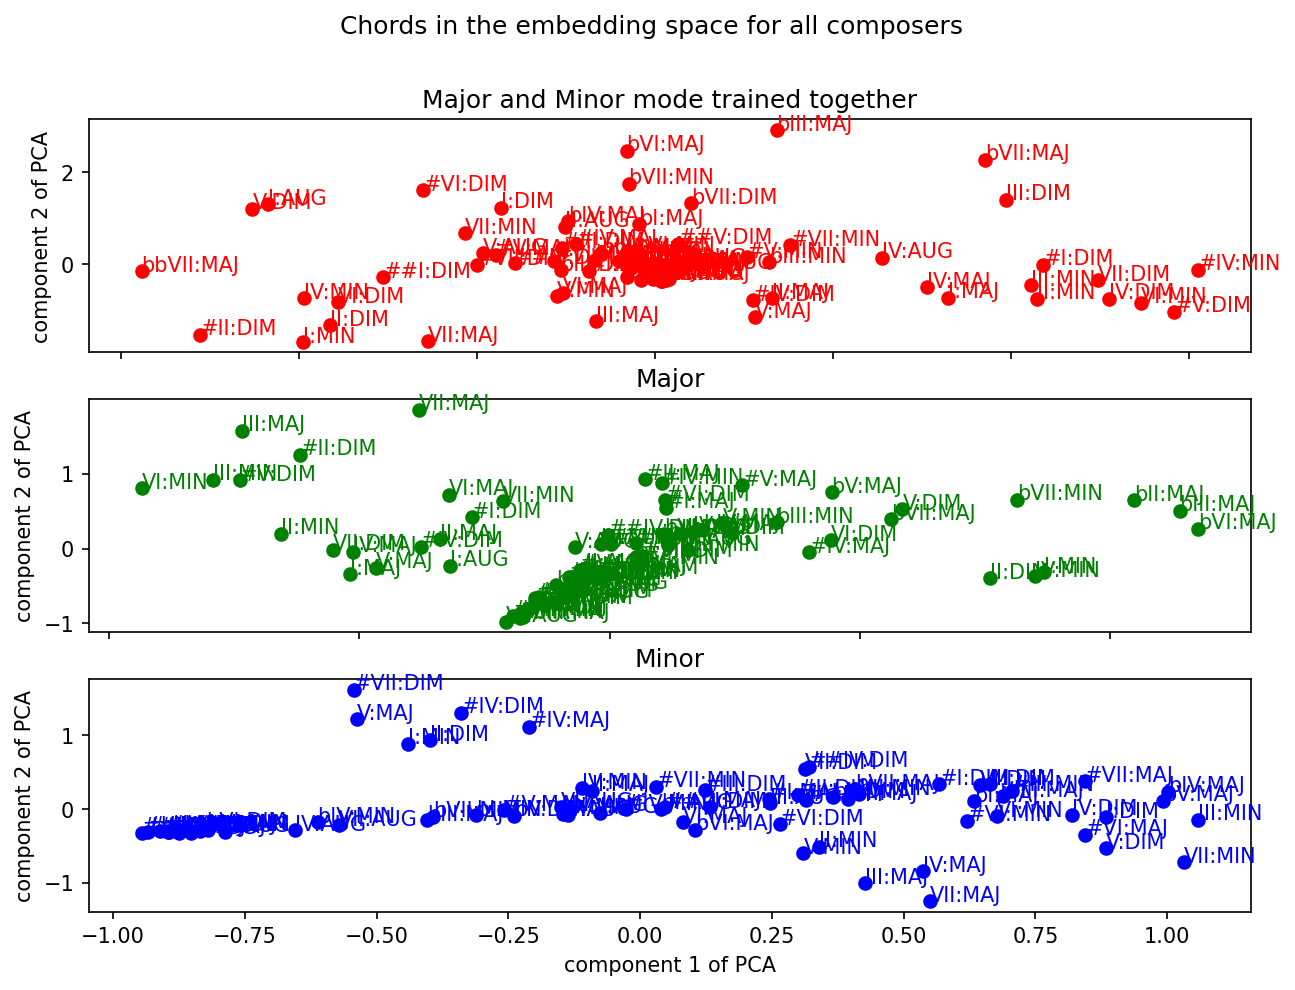

In [10]:
#Parameters : we use the Bach file
from helpers import *

file_names = ['Bach.csv', 'Beethoven.csv','Chopin.csv', 'Corelli.csv', 'Couperin.csv', 'Debussy.csv', 'Dvorak.csv', 
              'Gesualdo.csv', 'Grieg.csv', 'Kozeluh.csv', 'Liszt.csv', 'Medtner.csv', 'Mendelssohn.csv', 'Monteverdi.csv',
              'Mozart.csv','Pleyel.csv', 'Ravel.csv', 'Schubert.csv', 'Schumann.csv', 'Schütz.csv', 'Sweelinck.csv',
              'Tchaikovsky.csv', 'Wagner.csv','WFBach.csv']

file = 'Chopin.csv'
min_count = 1 #ignore words with less frequency than this
size = 20 #Size of the embedding space
window = 2 #Neighborhood of the focus word to study
sg = 0 #0 for CBOW, 1 for skip-gram



visualization(file_names, min_count, size, window, sg)

In [2]:
model, model_maj, model_min = models_word2vec(file_names, min_count, size, window, sg)

In [7]:
model_min.wv.similarity('I:MIN', 'IV:DIM')

0.5450448

In [8]:
model_min.wv.similarity('I:MIN', 'V:MAJ')

0.95253456

In [9]:
model_min.wv.most_similar('I:MIN', topn = 100)

[('V:MAJ', 0.952534556388855),
 ('II:DIM', 0.920606791973114),
 ('#IV:MAJ', 0.812545657157898),
 ('#VII:DIM', 0.803503155708313),
 ('#IV:DIM', 0.7910802364349365),
 ('IV:MIN', 0.7671806812286377),
 ('VII:DIM', 0.7512611746788025),
 ('#I:MIN', 0.7375410795211792),
 ('##IV:DIM', 0.7359663248062134),
 ('III:AUG', 0.7252994775772095),
 ('#VII:MIN', 0.7213108539581299),
 ('#I:MAJ', 0.71100914478302),
 ('##I:DIM', 0.7104064226150513),
 ('#II:MAJ', 0.7097449898719788),
 ('bIV:MIN', 0.7068553566932678),
 ('##VI:MIN', 0.7034722566604614),
 ('VI:MAJ', 0.6988210678100586),
 ('bVII:MAJ', 0.6852580308914185),
 ('#V:MAJ', 0.6830654740333557),
 ('bVI:DIM', 0.6815059781074524),
 ('VI:DIM', 0.6724220514297485),
 ('VII:AUG', 0.6684731245040894),
 ('bI:MIN', 0.6680121421813965),
 ('#II:DIM', 0.6640641093254089),
 ('bbII:MAJ', 0.6613004803657532),
 ('#II:MIN', 0.6594861745834351),
 ('bIV:AUG', 0.658445417881012),
 ('##VI:MAJ', 0.6561511754989624),
 ('##VI:DIM', 0.6542181968688965),
 ('#IV:MIN', 0.65396493